In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
df = pd.read_excel('Gadarwara_Q.xlsx')
df

,Dates,Year,Month,Day,RF_1,RF_2,RF_3,RF_4,RF_5,RF_6,RF_7,RF_8,RF_10,LRF,Q,Q(t-1),Q(t-2),Q(t-3),Unnamed: 18
0,1977-06-01,1977,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.60,0.00,0.00,0.00,0
1,1977-06-02,1977,6,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.60,1.60,0.00,0.00,0
2,1977-06-03,1977,6,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.60,1.60,1.60,0.00,0
3,1977-06-04,1977,6,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.60,1.60,1.60,1.60,0
4,1977-06-05,1977,6,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.60,1.60,1.60,1.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15701,2020-05-27,2020,5,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.08,0.09,0.10,0.11,0
15702,2020-05-28,2020,5,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.07,0.08,0.09,0.10,0
15703,2020-05-29,2020,5,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.05,0.07,0.08,0.09,0
15704,2020-05-30,2020,5,30,1.1,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0,0.05,0.05,0.07,0.08,0


In [3]:
part1 = df.drop(df.index[9496:15706])
part2 = df.drop(df.index[0:9496])
print(part1.shape, part2.shape)

(9496, 19) (6210, 19)


In [4]:
part1

,Dates,Year,Month,Day,RF_1,RF_2,RF_3,RF_4,RF_5,RF_6,RF_7,RF_8,RF_10,LRF,Q,Q(t-1),Q(t-2),Q(t-3),Unnamed: 18
0,1977-06-01,1977,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.600,0.000,0.000,0.000,0
1,1977-06-02,1977,6,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.600,1.600,0.000,0.000,0
2,1977-06-03,1977,6,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.600,1.600,1.600,0.000,0
3,1977-06-04,1977,6,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.600,1.600,1.600,1.600,0
4,1977-06-05,1977,6,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.600,1.600,1.600,1.600,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9491,2003-05-27,2003,5,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.390,0.391,0.350,0.435,0
9492,2003-05-28,2003,5,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.389,0.390,0.391,0.350,0
9493,2003-05-29,2003,5,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.360,0.389,0.390,0.391,0
9494,2003-05-30,2003,5,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.300,0.360,0.389,0.390,0


In [5]:
part2

,Dates,Year,Month,Day,RF_1,RF_2,RF_3,RF_4,RF_5,RF_6,RF_7,RF_8,RF_10,LRF,Q,Q(t-1),Q(t-2),Q(t-3),Unnamed: 18
9496,2003-06-01,2003,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.3500,0.3250,0.3000,0.3600,0
9497,2003-06-02,2003,6,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.3147,0.3500,0.3250,0.3000,0
9498,2003-06-03,2003,6,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.2500,0.3147,0.3500,0.3250,0
9499,2003-06-04,2003,6,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.2787,0.2500,0.3147,0.3500,0
9500,2003-06-05,2003,6,5,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0,0.2756,0.2787,0.2500,0.3147,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15701,2020-05-27,2020,5,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0800,0.0900,0.1000,0.1100,0
15702,2020-05-28,2020,5,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0700,0.0800,0.0900,0.1000,0
15703,2020-05-29,2020,5,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0500,0.0700,0.0800,0.0900,0
15704,2020-05-30,2020,5,30,1.1,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0,0.0500,0.0500,0.0700,0.0800,0


In [6]:
med1 = part1['Q'].median()
mean1 = part1['Q'].mean()
std1 = part1['Q'].std()
CV1 = (std1/mean1)*100
print(med1, mean1, std1, CV1)

4.6235 44.05999824136479 181.52612836101002 411.997584218213


In [7]:
med2 = part2['Q'].median()
mean2 = part2['Q'].mean()
std2 = part2['Q'].std()
CV2 = (std2/mean2)*100
print(med2, mean2, std2, CV2)

2.7612463 48.06509374890885 167.11887663623915 347.69281322796337


In [8]:
zero_count_1 = (part1['Q'] == 0).sum() 
perc_0values1 = (zero_count_1/9496)*100
print(zero_count_1, perc_0values1)

59 0.6213142375737153


In [9]:
zero_count_2 = (part2['Q'] == 0).sum() 
perc_0values2 = (zero_count_2/6210)*100
print(zero_count_2, perc_0values2)

998 16.07085346215781


# MLR STARTS HERE

In [10]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

[0.55883414] 19.437785996419265 0.21267012335197966 21985.573908382015


<function matplotlib.pyplot.show(close=None, block=None)>

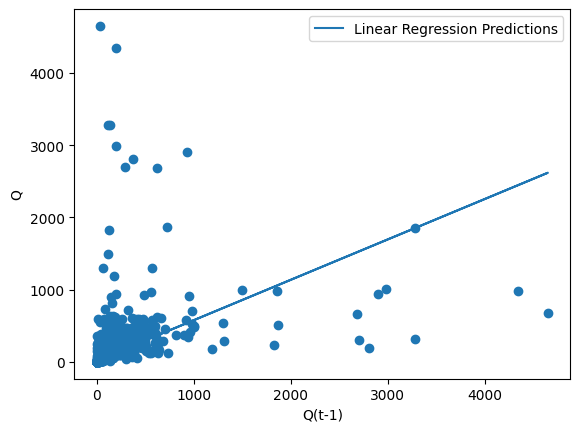

In [11]:
# independent variable = Q(t-1)
model1 = linear_model.LinearRegression()
model1.fit(part1[['Q(t-1)']], part1.Q)
Q_pred1 = model1.predict(part2[['Q(t-1)']])
R2_score1 = r2_score(part2[['Q']], Q_pred1)
MSE1 = mean_squared_error(part2[['Q']], Q_pred1)
print(model1.coef_, model1.intercept_, R2_score1, MSE1)
plt.scatter(part2[['Q(t-1)']], part2[['Q']])
plt.plot(part2[['Q(t-1)']], Q_pred1, label='Linear Regression Predictions')
plt.xlabel('Q(t-1)')
plt.ylabel('Q')
plt.legend()
plt.show

[0.4141531] 25.812440586910903 0.13238600053699323 24227.445540807817


<function matplotlib.pyplot.show(close=None, block=None)>

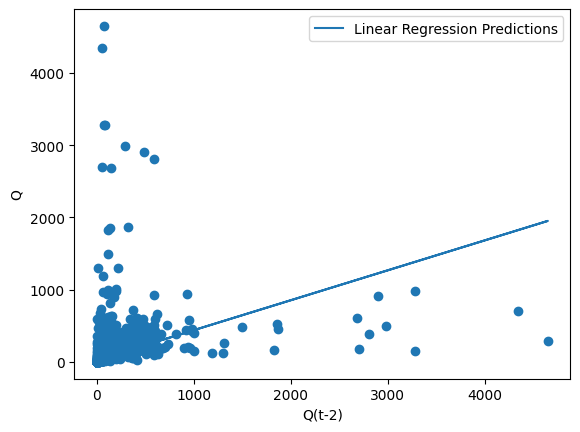

In [12]:
# independent variable = Q(t-2)
model2 = linear_model.LinearRegression()
model2.fit(part1[['Q(t-2)']], part1.Q)
Q = part2[['Q']]
Q_pred2 = model2.predict(part2[['Q(t-2)']])
R2_score2 = r2_score(part2[['Q']], Q_pred2)
MSE2 = mean_squared_error(part2[['Q']], Q_pred2)
print(model2.coef_, model2.intercept_, R2_score2, MSE2)
plt.scatter(part2[['Q(t-2)']], part2[['Q']])
plt.plot(part2[['Q(t-2)']], Q_pred2, label='Linear Regression Predictions')
plt.xlabel('Q(t-2)')
plt.ylabel('Q')
plt.legend()
plt.show

[0.38592824] 27.056040663245682 0.1088043610009678 24885.944467721893


<function matplotlib.pyplot.show(close=None, block=None)>

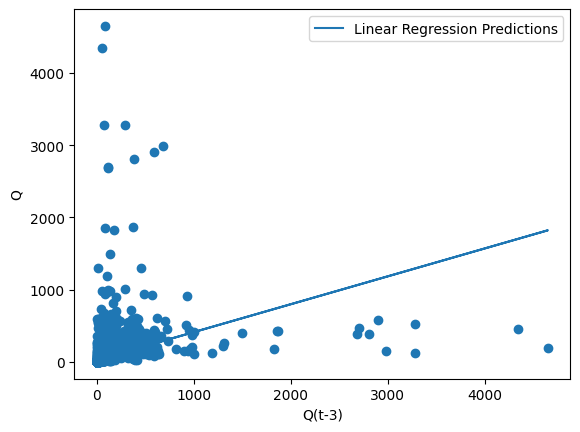

In [13]:
# independent variable = Q(t-3)
model3 = linear_model.LinearRegression()
model3.fit(part1[['Q(t-3)']], part1.Q)
Q = part2[['Q']]
Q_pred3 = model3.predict(part2[['Q(t-3)']])
R2_score3 = r2_score(part2[['Q']], Q_pred3)
MSE3 = mean_squared_error(part2[['Q']], Q_pred3)
print(model3.coef_, model3.intercept_, R2_score3, MSE3)
plt.scatter(part2[['Q(t-3)']], part2[['Q']])
plt.plot(part2[['Q(t-3)']], Q_pred3, label='Linear Regression Predictions')
plt.xlabel('Q(t-3)')
plt.ylabel('Q')
plt.legend()
plt.show

In [14]:
# independent variable = Q(t-1), Q(t-2)
model4 = linear_model.LinearRegression()
model4.fit(part1[['Q(t-1)', 'Q(t-2)']], part1.Q)
Q_pred4 = model4.predict(part2[['Q(t-1)', 'Q(t-2)']])
R2_score4 = r2_score(part2[['Q']], Q_pred4)
MSE4 = mean_squared_error(part2[['Q']], Q_pred4)
print(model4.coef_, model4.intercept_, R2_score4, MSE4)

[0.47606391 0.14811231] 16.558820871910925 0.24115663215226402 21190.110325459435


In [15]:
# independent variable = Q(t-1), Q(t-3)
model5 = linear_model.LinearRegression()
model5.fit(part1[['Q(t-1)', 'Q(t-3)']], part1.Q)
Q_pred5 = model5.predict(part2[['Q(t-1)', 'Q(t-3)']])
R2_score5 = r2_score(part2[['Q']], Q_pred5)
MSE5 = mean_squared_error(part2[['Q']], Q_pred5)
print(model5.coef_, model5.intercept_, R2_score5, MSE5)

[0.4816074  0.18646902] 14.624588416093971 0.244433123544344 21098.616853920626


In [16]:
# independent variable = Q(t-2), Q(t-3)
model6 = linear_model.LinearRegression()
model6.fit(part1[['Q(t-2)', 'Q(t-3)']], part1.Q)
Q_pred6 = model6.predict(part2[['Q(t-2)', 'Q(t-3)']])
R2_score6 = r2_score(part2[['Q']], Q_pred6)
MSE6 = mean_squared_error(part2[['Q']], Q_pred6)
print(model6.coef_, model6.intercept_, R2_score6, MSE6)

[0.28861704 0.22463916] 21.44597323816262 0.1672628636401463 23253.536288549516


In [17]:
# independent variable = Q(t-1), Q(t-2), Q(t-3)
model7 = linear_model.LinearRegression()
model7.fit(part1[['Q(t-1)', 'Q(t-2)', 'Q(t-3)']], part1.Q)
Q_pred7 = model7.predict(part2[['Q(t-1)', 'Q(t-2)', 'Q(t-3)']])
R2_score7 = r2_score(part2[['Q']], Q_pred7)
MSE7 = mean_squared_error(part2[['Q']], Q_pred7)
print(model7.coef_, model7.intercept_, R2_score7, MSE7)

[0.4527236  0.07309166 0.15758521] 13.949411370285247 0.2548882570372216 20806.665389931633
